<a href="https://colab.research.google.com/github/FarzanaAdiba/Assignment-05/blob/main/Assignment5_Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from skimage import io
import numpy as np
import numpy.matlib

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


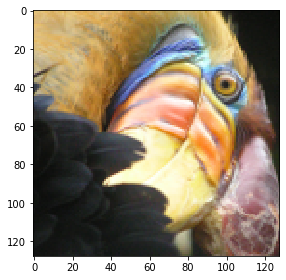

In [34]:
image = io.imread('/content/drive/MyDrive/input.png')
io.imshow(image)
io.show()

In [35]:
rows = image.shape[0]
cols = image.shape[1]
image = image/255

In [36]:
X = image.reshape(image.shape[0]*image.shape[1],3)

In [37]:
#number of clusters as input
K = int(input("Number of clusters: ")) 
max_iters = 50 

Number of clusters: 5


In [38]:
#Taking the initial centroids
import random
def init_cents(X,K):
    c = random.sample(list(X),K)
    return c

In [39]:
def nearest_cents(X,c):
    K = np.size(c,0)
    idx = np.zeros((np.size(X,0),1))
    arr = np.empty((np.size(X,0),1))
    for i in range(0,K):
        y = c[i]
        temp = np.ones((np.size(X,0),1))*y
        b = np.power(np.subtract(X,temp),2)
        a = np.sum(b,axis = 1)
        a = np.asarray(a)
        a.resize((np.size(X,0),1))
        #print(np.shape(a))
        arr = np.append(arr, a, axis=1)
    arr = np.delete(arr,0,axis=1)
    idx = np.argmin(arr, axis=1)
    return idx

In [40]:
def calc_cents(X,idx,K):
    n = np.size(X,1)
    centroids = np.zeros((K,n))
    for i in range(0,K):
        ci = idx==i
        ci = ci.astype(int)
        total_number = sum(ci);
        ci.resize((np.size(X,0),1))
        total_matrix = np.matlib.repmat(ci,1,n)
        ci = np.transpose(ci)
        total = np.multiply(X,total_matrix)
        centroids[i] = (1/total_number)*np.sum(total,axis=0)
    return centroids

In [41]:
def run_kMean(X,init_cents,max_iters):
    m = np.size(X,0)
    n = np.size(X,1)
    K = np.size(init_cents,0)
    centroids = init_cents
    previous_centroids = centroids
    idx = np.zeros((m,1))
    for i in range(1,max_iters):
        idx = nearest_cents(X,centroids)
        centroids = calc_cents(X,idx,K)
    return centroids,idx

In [42]:
init_cents = init_cents(X,K)
centroids,idx = run_kMean(X,init_cents,max_iters)
#idx.resize((np.size(X,0),1))
print(np.shape(centroids))
print(np.shape(idx))

(5, 3)
(16384,)


In [43]:
idx = nearest_cents(X,centroids)
X_recovered = centroids[idx]
print(np.shape(X_recovered))
X_recovered = np.reshape(X_recovered, (rows, cols, 3))
print(np.shape(X_recovered))

(16384, 3)
(128, 128, 3)


In [44]:
import imageio
io.imsave('input_new.jpg', X_recovered)

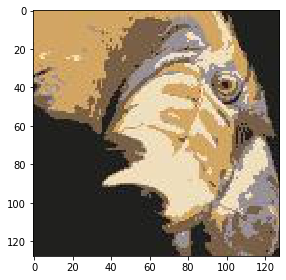

In [45]:
#Save the new generated image as a jpg file
image_compressed = io.imread('input_new.jpg')
io.imshow(image_compressed)
io.show()